### LeNet from Scratch

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*fDvp2DDqNMPEUkmp6kijJw.jpeg" alt="Description of your image">
</div>

In [1]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchsummary
import torchvision.transforms as transforms

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv_1 = nn.Conv2d(3, 6, kernel_size = 5) # 1 input channel, 6 output channels, 5x5 kernel
        self.conv_2 = nn.Conv2d(6, 16, kernel_size = 5) # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Convolutional layer
        x = F.relu(self.conv_1(x))
        # Max pooling
        x = F.max_pool2d(x, (2, 2))
        # Convolutional layer
        x = F.relu(self.conv_2(x))
        # Max pooling
        x = F.max_pool2d(x, (2, 2))
        # Flatten
        x = x.view(-1, self.flattened_features(x))
        # Fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def flattened_features(self, x): # Function to calculate the number of features
        size = x.size()[1:] # All dimensions except the batch dimension
        num_features = 1 # Initialize the number of features
        for s in size:
            num_features *= s # Multiply all dimensions to get the number of features
        return num_features # Return the number of features

In [3]:
lenet = LeNet()
print(lenet)

LeNet(
  (conv_1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
def train_model(model, trainloader, optim, epoch, device):
    model.train()  # Set model to training mode
    running_loss = 0.0  # Renamed from loss to running_loss for clarity
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # Move data to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        optim.zero_grad()
        outputs = model(inputs)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optim.step()

        # update running loss
        running_loss += loss.item()

        if (i + 1) % 1000 == 0:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 1000}')
            running_loss = 0.0

def test_model(model, testloader, device):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # Move data to GPU
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print(f'Accuracy: {100 * correct / total}%')

In [5]:
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, 4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 8, shuffle = True)

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 100000, shuffle = False)

classes =  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


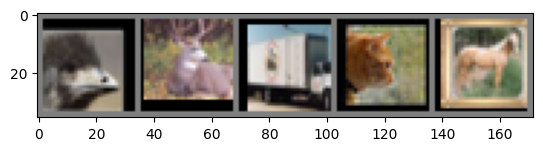

    bird  ||  deer  ||  truck  ||  cat  ||  horse


In [6]:
def image_show(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(numpy.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

num_images = 5
image_show(torchvision.utils.make_grid(images[:num_images]))
# Print labels
print('    '+'  ||  '.join(classes[labels[j]] for j in range(num_images)))

In [7]:
# Usage example:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lenet = lenet.to(device)  # Move model to GPU
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)

In [8]:
# training loop over the dataset multiple times
for epoch in range(50):  
    train_model(lenet, trainloader, optimizer, epoch, device)
    print()
    test_model(lenet, testloader, device)
    print()

print('Finished Training')

Epoch 1, Batch 1000, Loss: 1.9653006980419159
Epoch 1, Batch 2000, Loss: 1.74494209587574
Epoch 1, Batch 3000, Loss: 1.6515751749873162
Epoch 1, Batch 4000, Loss: 1.6103689278960227
Epoch 1, Batch 5000, Loss: 1.557941994726658
Epoch 1, Batch 6000, Loss: 1.5548009640574456

Accuracy: 50.19%

Epoch 2, Batch 1000, Loss: 1.509618847846985
Epoch 2, Batch 2000, Loss: 1.4654794049263
Epoch 2, Batch 3000, Loss: 1.4665448776483536
Epoch 2, Batch 4000, Loss: 1.4491258111596108
Epoch 2, Batch 5000, Loss: 1.4454254003167153
Epoch 2, Batch 6000, Loss: 1.425426328599453

Accuracy: 52.55%

Epoch 3, Batch 1000, Loss: 1.400093005478382
Epoch 3, Batch 2000, Loss: 1.38694128164649
Epoch 3, Batch 3000, Loss: 1.3725549378097057
Epoch 3, Batch 4000, Loss: 1.3849651216864587
Epoch 3, Batch 5000, Loss: 1.3604094991385938
Epoch 3, Batch 6000, Loss: 1.364700373262167

Accuracy: 55.87%

Epoch 4, Batch 1000, Loss: 1.3465517052412033
Epoch 4, Batch 2000, Loss: 1.3537630774974823
Epoch 4, Batch 3000, Loss: 1.310220

In [9]:
# Savel model
torch.save(lenet.state_dict(), 'lenet.pth')

# Print the model summary
torchsummary.summary(lenet, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


In [14]:
from torchviz import make_dot

x = torch.randn(1, 3, 32, 32).requires_grad_(True).to(device)
y = lenet(x)

make_dot(y, params=dict(list(lenet.named_parameters()))).render("lenet", format="png", cleanup=True)

'lenet.png'

![lenet](lenet.png)

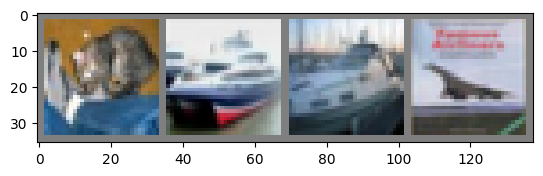

Label:         cat  ship  ship plane


In [15]:
d_iter = iter(testloader)
image, label = next(d_iter)

# print images and ground truth
image_show(torchvision.utils.make_grid(image[:4]))
print('Label:      ', ' '.join('%5s' % classes[label[j]] for j in range(4)))

In [16]:
lenet_loaded = LeNet()
lenet_loaded.load_state_dict(torch.load('lenet.pth'))

/tmp/ipykernel_7228/144910188.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lenet_loaded.load_state_dict(torch.load('lenet.pth'))


<All keys matched successfully>

In [17]:
# model inference
op = lenet_loaded(image)

# print predictions
_, pred = torch.max(op, 1)

print('Prediction: ', ' '.join('%5s' % classes[pred[j]] for j in range(4)))

Prediction:    cat  ship   car plane


Accuracy of plane: 76.4%
Accuracy of car: 85.9%
Accuracy of bird: 57.0%
Accuracy of cat: 47.9%
Accuracy of deer: 66.8%
Accuracy of dog: 45.4%
Accuracy of frog: 68.8%
Accuracy of horse: 69.5%
Accuracy of ship: 72.5%
Accuracy of truck: 68.3%
[[764  34  57  16  13   2   4  14  68  28]
 [ 35 859   4   9   6   1   6   6  24  50]
 [ 85   6 570  54 118  48  50  42  17  10]
 [ 46  17  85 479  82 145  59  37  25  25]
 [ 36  11  62  54 668  15  58  79  10   7]
 [ 30   8  84 241  58 454  19  83   8  15]
 [ 17  14  82  95  65   5 688  10  16   8]
 [ 26   8  48  64  80  42   6 695   5  26]
 [138  53  15  13  11   3   2   7 725  33]
 [ 65 159   7  18   7   3   7  26  25 683]]


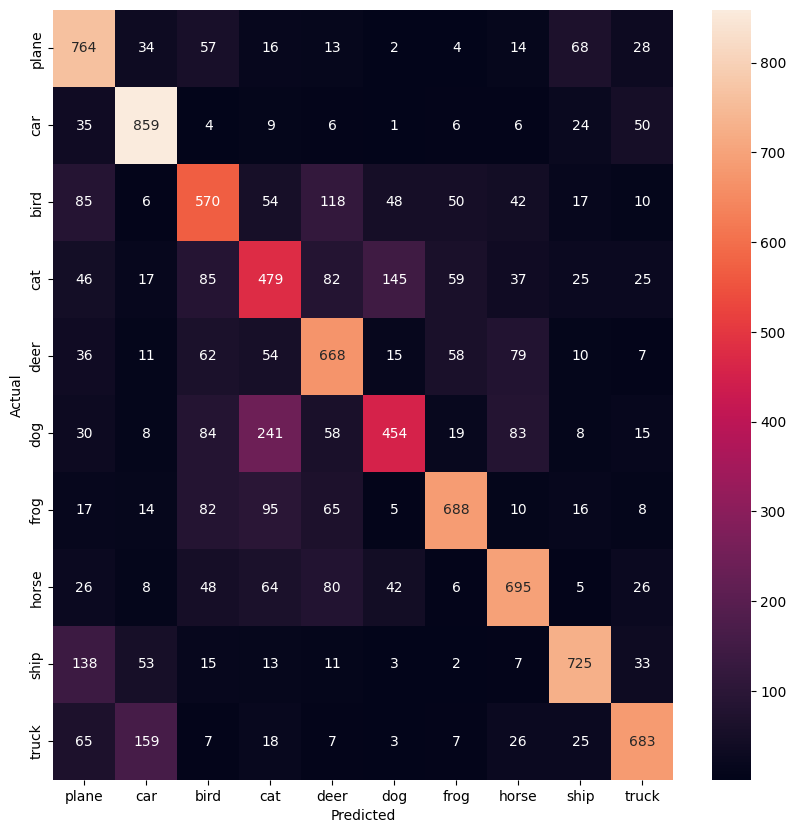

In [19]:
# Print the total as well as class-wise accuracy

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

lenet_loaded.to(device)

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = lenet_loaded(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10000):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]}%')

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

confusion_matrix = confusion_matrix(labels.cpu().numpy(), predicted.cpu().numpy())
print(confusion_matrix)

# Plot the confusion matrix
import seaborn as sns
import pandas as pd

plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()